In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [2]:
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)
print("x_test :",x_test.shape)
print("y_test :",y_test.shape)

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
#Cnn layer only works with 4dim array
import numpy as np
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)
print(x_train.ndim)
print(x_test.ndim)

4
4


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [6]:
CNN_model=Sequential([
                      Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      MaxPool2D((2,2)),
                      Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      MaxPool2D((2,2)),
                      Conv2D(filters=128,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      Flatten(),
                      Dense(units=64,activation="relu"),
                      Dense(units=10,activation="softmax"),
                      ])
CNN_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [7]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [8]:
CNN_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=2)

Epoch 1/10
1875/1875 - 29s - loss: 0.4728 - accuracy: 0.8258 - val_loss: 0.3658 - val_accuracy: 0.8713 - 29s/epoch - 15ms/step
Epoch 2/10
1875/1875 - 26s - loss: 0.3042 - accuracy: 0.8885 - val_loss: 0.3183 - val_accuracy: 0.8856 - 26s/epoch - 14ms/step
Epoch 3/10
1875/1875 - 27s - loss: 0.2615 - accuracy: 0.9031 - val_loss: 0.3174 - val_accuracy: 0.8809 - 27s/epoch - 14ms/step
Epoch 4/10
1875/1875 - 26s - loss: 0.2286 - accuracy: 0.9151 - val_loss: 0.2817 - val_accuracy: 0.8959 - 26s/epoch - 14ms/step
Epoch 5/10
1875/1875 - 25s - loss: 0.2033 - accuracy: 0.9242 - val_loss: 0.2715 - val_accuracy: 0.9039 - 25s/epoch - 14ms/step
Epoch 6/10
1875/1875 - 24s - loss: 0.1813 - accuracy: 0.9318 - val_loss: 0.2572 - val_accuracy: 0.9079 - 24s/epoch - 13ms/step
Epoch 7/10
1875/1875 - 25s - loss: 0.1658 - accuracy: 0.9370 - val_loss: 0.2691 - val_accuracy: 0.9081 - 25s/epoch - 13ms/step
Epoch 8/10
1875/1875 - 25s - loss: 0.1463 - accuracy: 0.9455 - val_loss: 0.2712 - val_accuracy: 0.9110 - 25s/ep

In [9]:
test_loss,test_accuracy=CNN_model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.2742 - accuracy: 0.9135 - 1s/epoch - 4ms/step


In [10]:
print("Test_accuracy",test_accuracy)

Test_accuracy 0.9135000109672546


In [12]:
y_pred=CNN_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [13]:
obtained_value=[np.argmax(elements) for elements in y_pred]

In [16]:
from sklearn.metrics import classification_report
print("Classification_report: /n",classification_report(y_test,obtained_value))

Classification_report: /n               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.90      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.88      0.83      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.74      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.96      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [18]:
new_trainx=x_train[:3000]
new_trainy=y_train[:3000]

In [20]:
new_trainx.shape

(3000, 28, 28, 1)

In [22]:
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [23]:
datagen=ImageDataGenerator(rotation_range=40,shear_range=0.2,
                          height_shift_range=0.3,width_shift_range=0.3,zoom_range=0.5,horizontal_flip=True,fill_mode="nearest")

In [25]:
Augumented_data=datagen.flow(new_trainx,new_trainy,batch_size=40,seed=42)

# Augumented data as validation data

In [42]:
Aug_model=Sequential([
                      Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      MaxPool2D((2,2)),
                      Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      MaxPool2D((2,2)),
                      Conv2D(filters=128,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      Flatten(),
                      Dense(units=64,activation="relu"),
                      Dense(units=10,activation="softmax"),
                      ])
Aug_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [43]:
Aug_model=Aug_model.fit(x_train,y_train,epochs=15,validation_data=Augumented_data,verbose=2)

Epoch 1/15
1875/1875 - 21s - loss: 0.4852 - accuracy: 0.8219 - val_loss: 4.2318 - val_accuracy: 0.2050 - 21s/epoch - 11ms/step
Epoch 2/15
1875/1875 - 21s - loss: 0.3131 - accuracy: 0.8845 - val_loss: 4.5159 - val_accuracy: 0.2073 - 21s/epoch - 11ms/step
Epoch 3/15
1875/1875 - 22s - loss: 0.2656 - accuracy: 0.9016 - val_loss: 4.8586 - val_accuracy: 0.2020 - 22s/epoch - 12ms/step
Epoch 4/15
1875/1875 - 23s - loss: 0.2344 - accuracy: 0.9126 - val_loss: 4.9002 - val_accuracy: 0.1943 - 23s/epoch - 12ms/step
Epoch 5/15
1875/1875 - 23s - loss: 0.2075 - accuracy: 0.9228 - val_loss: 4.8731 - val_accuracy: 0.2037 - 23s/epoch - 12ms/step
Epoch 6/15
1875/1875 - 24s - loss: 0.1881 - accuracy: 0.9301 - val_loss: 5.6593 - val_accuracy: 0.1940 - 24s/epoch - 13ms/step
Epoch 7/15
1875/1875 - 24s - loss: 0.1676 - accuracy: 0.9377 - val_loss: 5.5218 - val_accuracy: 0.2230 - 24s/epoch - 13ms/step
Epoch 8/15
1875/1875 - 24s - loss: 0.1495 - accuracy: 0.9441 - val_loss: 6.2965 - val_accuracy: 0.2043 - 24s/ep

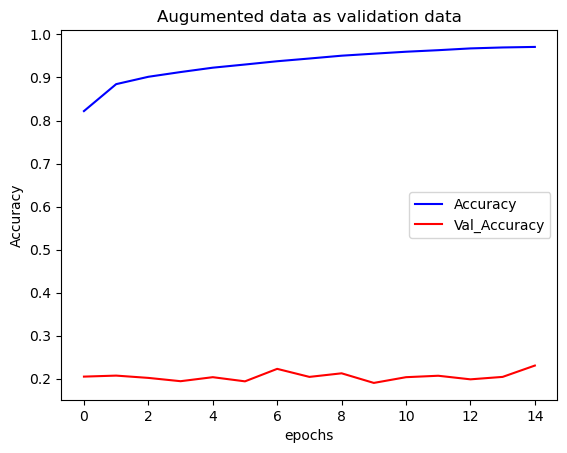

In [44]:
import matplotlib.pyplot as plt
plt.plot(Aug_model.history['accuracy'],'b')
plt.plot(Aug_model.history['val_accuracy'],'r')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy","Val_Accuracy"])
plt.title("Augumented data as validation data")
plt.show()        

# Augumented data as train data

In [31]:
Augg_model=Sequential([
                      Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      MaxPool2D((2,2)),
                      Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      MaxPool2D((2,2)),
                      Conv2D(filters=128,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
                      Flatten(),
                      Dense(units=64,activation="relu"),
                      Dense(units=10,activation="softmax"),
                      ])
Augg_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [33]:
Augg_model=Augg_model.fit(Augumented_data,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
75/75 - 3s - loss: 1.2280 - accuracy: 0.5457 - val_loss: 1.0306 - val_accuracy: 0.6150 - 3s/epoch - 43ms/step
Epoch 2/30
75/75 - 3s - loss: 1.2534 - accuracy: 0.5440 - val_loss: 0.9471 - val_accuracy: 0.6547 - 3s/epoch - 42ms/step
Epoch 3/30
75/75 - 3s - loss: 1.2131 - accuracy: 0.5573 - val_loss: 1.0115 - val_accuracy: 0.6281 - 3s/epoch - 42ms/step
Epoch 4/30
75/75 - 3s - loss: 1.1821 - accuracy: 0.5607 - val_loss: 0.9282 - val_accuracy: 0.6452 - 3s/epoch - 45ms/step
Epoch 5/30
75/75 - 3s - loss: 1.1858 - accuracy: 0.5677 - val_loss: 0.9869 - val_accuracy: 0.6486 - 3s/epoch - 44ms/step
Epoch 6/30
75/75 - 3s - loss: 1.1691 - accuracy: 0.5680 - val_loss: 0.9142 - val_accuracy: 0.6582 - 3s/epoch - 44ms/step
Epoch 7/30
75/75 - 3s - loss: 1.1325 - accuracy: 0.5713 - val_loss: 0.9440 - val_accuracy: 0.6550 - 3s/epoch - 42ms/step
Epoch 8/30
75/75 - 3s - loss: 1.1305 - accuracy: 0.5883 - val_loss: 0.9729 - val_accuracy: 0.6385 - 3s/epoch - 41ms/step
Epoch 9/30
75/75 - 3s - loss: 1.

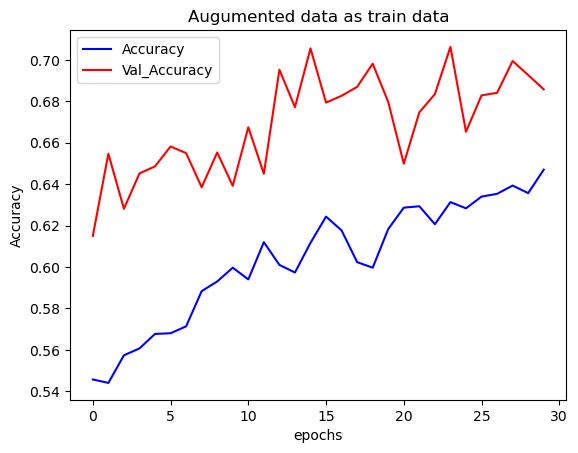

In [45]:
import matplotlib.pyplot as plt
plt.plot(Augg_model.history['accuracy'],'b')
plt.plot(Augg_model.history['val_accuracy'],'r')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy","Val_Accuracy"])
plt.title("Augumented data as train data")
plt.show()                    